Name :- Arun M
Register No :- 23122110

In [129]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [130]:
import pandas as pd
df=pd.read_csv("nasav3.csv")
print(df)


      Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0                 21.600            0.127220            0.284472   
1                 21.300            0.146068            0.326618   
2                 20.300            0.231502            0.517654   
3                 27.400            0.008801            0.019681   
4                 21.600            0.127220            0.284472   
...                  ...                 ...                 ...   
4682              23.900            0.044112            0.098637   
4683              28.200            0.006089            0.013616   
4684              22.700            0.076658            0.171412   
4685              21.800            0.116026            0.259442   
4686              19.109            0.400641            0.895860   

      Epoch Date Close Approach  Relative Velocity km per hr  Miles per hour  \
0                  7.890000e+11                  22017.00380    13680.509940   
1                  7.89

In [131]:
print(df.columns)

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')


In [132]:
features = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion']

X = df[features]
y = df['Hazardous']

print(X)
print(y)

      Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0                 21.600            0.127220            0.284472   
1                 21.300            0.146068            0.326618   
2                 20.300            0.231502            0.517654   
3                 27.400            0.008801            0.019681   
4                 21.600            0.127220            0.284472   
...                  ...                 ...                 ...   
4682              23.900            0.044112            0.098637   
4683              28.200            0.006089            0.013616   
4684              22.700            0.076658            0.171412   
4685              21.800            0.116026            0.259442   
4686              19.109            0.400641            0.895860   

      Epoch Date Close Approach  Relative Velocity km per hr  Miles per hour  \
0                  7.890000e+11                  22017.00380    13680.509940   
1                  7.89

In [133]:
import numpy as np
X=np.array(df)
y=X[:,22]
X=X[:,:21]

print(X)
print(y)

[[2.16000000e+01 1.27219879e-01 2.84472297e-01 ... 2.00576367e+00
  2.45816164e+06 2.64837533e+02]
 [2.13000000e+01 1.46067964e-01 3.26617897e-01 ... 1.49735229e+00
  2.45779497e+06 1.73741112e+02]
 [2.03000000e+01 2.31502122e-01 5.17654482e-01 ... 1.96685667e+00
  2.45812047e+06 2.92893654e+02]
 ...
 [2.27000000e+01 7.66575570e-02 1.71411509e-01 ... 2.09070784e+00
  2.45830048e+06 2.03501147e+02]
 [2.18000000e+01 1.16025908e-01 2.59441818e-01 ... 1.78773308e+00
  2.45828826e+06 2.03524965e+02]
 [1.91090000e+01 4.00640618e-01 8.95859655e-01 ... 2.07198006e+00
  2.45831859e+06 1.84820424e+02]]
[1. 0. 1. ... 0. 0. 0.]


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [136]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree = dtree.fit(X_train, y_train)

(3515, 21)


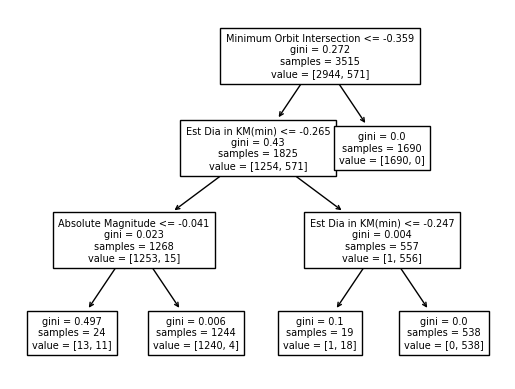

In [137]:
tree.plot_tree(dtree, feature_names=features,fontsize=7)
print(X_train.shape)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For Decesion TReee
# Predict labels for test set
y_pred = dtree.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9948805460750854


In [139]:
Sclf = SVC(kernel='sigmoid')
Sclf = Sclf.fit(X_train, y_train)

In [140]:
# For For support vector classifier
# Predict labels for test set
y_pred = Sclf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8651877133105802


In [141]:
cm=confusion_matrix(y_test,y_pred)
print("confusion_matrix")
print(cm)

confusion_matrix
[[907  81]
 [ 77 107]]
